In [ ]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from sympy import symbols, diff

#Relatório 4

**Nome:** Yasmin Souza Camargo

##Métodos

In [ ]:
def trapezio(a, b, n, f):
  print('\n=== Trapézio ===')

  if (n == 1):
    h = b - a
    trap = h * (f(a) + f(b)) / 2

  else:
    h = (b - a) / n
    sum = f(a)

    for i in range(1, n):
      sum += 2 * f(a + i * h)

    sum += f(b)
    trap = h * sum / 2

  print(f'=> Resultado: {trap}')

In [ ]:
def simpson_13(a, b, n, f):
  print('\n=== Simpson 1/3 ===')
  if (n == 1):
    h = b - a
    simp13 = 2 * h * (f(a) + 4 * f((a + b) / 2) + f(b)) / 6

  else:
    h = (b - a) / n
    sum = f(a) + f(b)

    for i in range(1, n):
      x = a + i * h
      if i % 2 == 0:
        sum += 2 * f(x)
      else:
        sum += 4 * f(x)

    simp13 = h * sum / 3

  print(f'=> Resultado: {simp13}')

In [ ]:
def simpson_38(a, b, n, f):
  print('\n=== Simpson 3/8 ===')
  if n == 1:
      h = b - a
      simp38 = 3 * h * (f(a) + 3*f((2*a + b) / 3) + 3*f((a + 2*b) / 3) + f(b)) / 8
  else:
      h = (b - a) / n
      sum = f(a) + f(b)
      for i in range(1, n):
          if i % 3 == 0:
              sum += 2 * f(a + i * h)
          else:
              sum += 3 * f(a + i * h)
      simp38 = 3 * h * sum / 8

  print(f'=> Resultado: {simp38}')

In [ ]:
def euler(a, b, y0, m, function):
  print('\n=== Euler ===')
  h = (b - a) / m
  x = a
  y = y0

  VetX, VetY = [0] * (m+1), [0] * (m+1)
  VetX[0] = x
  VetY[0] = y

  fxy = function(x, y)

  for i in range(1, m+1):
    x = a + i * h
    y = y + h * fxy
    fxy = function(x, y)

    VetX[i] = x
    VetY[i] = y

  print(f'=> Resultado: {VetY[-1]}')

In [ ]:
def rk4(a, b, y0, m, function):
  print('\n=== RK4 ===')
  h = (b - a) / m
  xt = a
  yt = y0

  VetX, VetY = [0] * (m+1), [0] * (m+1)
  VetX[0] = xt
  VetY[0] = yt

  for i in range(1, m+1):
    x, y = xt, yt
    k1 = f(x, y)

    x, y = xt + h/2, yt + (h/2) * k1
    k2 = f(x, y)

    y = yt + (h/2) * k2
    k3 = f(x, y)

    x, y= xt + h, yt + h * k3
    k4 = f(x, y)

    xt, yt = a + i * h, yt + (h/6) * (k1 + 2 * (k2 + k3) + k4)

    VetX[i] = xt
    VetY[i] = yt

  print(f'=> Resultado: {VetY[-1]}')

In [ ]:
def graficoTrapesio(a, b, n, f):
    h = (b - a) / n
    x_vals = np.linspace(a, b, 100)
    y_vals = [f(x) for x in x_vals]
    plt.plot(x_vals, y_vals, label='Função Original')

    for i in range(n):
        x_trap = [a + i * h, a + (i + 1) * h]
        y_trap = [f(x_trap[0]), f(x_trap[1])]
        plt.plot(x_trap, y_trap, 'r--')
    plt.title('Gráfico Trapésio')
    plt.legend()
    plt.show()

def graficoSimpson_13(a, b, n, f):
    x_vals = np.linspace(a, b, 100)
    y_vals = f(x_vals)

    area_x = np.linspace(a, b, n + 1)
    area_y = f(area_x)

    plt.plot(x_vals, y_vals, label='Função Original')

    for i in range(n):
        x_segment = np.linspace(area_x[i], area_x[i+1], 100)
        y_segment = f(x_segment)
        p = np.polyfit([area_x[i], (area_x[i] + area_x[i+1])/2, area_x[i+1]],
                       [f(area_x[i]), f((area_x[i] + area_x[i+1])/2), f(area_x[i+1])], 2)
        y_parabola = np.polyval(p, x_segment)
        plt.plot(x_segment, y_parabola, 'r--')
    plt.title('Gráfico Simpson 1/3')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

def graficoSimpson_38(a, b, n, f):
    x_vals = np.linspace(a, b, 100)
    y_vals = f(x_vals)

    area_x = np.linspace(a, b, n + 1)
    area_y = f(area_x)
    plt.plot(x_vals, y_vals, label='Função Original')

    for i in range(n):
      x_segment = np.linspace(area_x[i], area_x[i + 1], 100)
      y_segment = f(x_segment)
      p = np.polyfit([area_x[i], (2 * area_x[i] + area_x[i + 1]) / 3, (area_x[i] + 2 * area_x[i + 1]) / 3,
                      area_x[i + 1]],
                      [f(area_x[i]), f((2 * area_x[i] + area_x[i + 1]) / 3),
                      f((area_x[i] + 2 * area_x[i + 1]) / 3), f(area_x[i + 1])], 3)
      y_curve = np.polyval(p, x_segment)
      plt.plot(x_segment, y_curve, 'r--')
    plt.title('Gráfico Simpson 3/8')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()


##Questões

###Questão 1
**Calcular**
\begin{equation}
    \int_{2}^{5} \frac{1}{x \log_e(x)} \, dx
\end{equation}
**com m = 6 pelas regras abaixo.**

**a) Trapézio**

**b) 1/3 de Simpson**

**c) 3/8 de Simpson**

**d) Comparar esses três resultados com o valor exato log_e * (log_e*(5)) − log_e* (log_e*(2)) ≈ 0,84240**

**e) Plotar os gráficos para cada um dos métodos**

Abaixo segue as execuções dos métodos do trapézio, 1/3 de Simpson e 3/8 de simpson. Foram obtidos os seguintes resultados:

In [ ]:
a = 2
b = 5
m = 6
f = lambda x: 1 / (x * np.log(x))

trapezio(a, b, m, f)
simpson_13(a, b, m, f)
simpson_38(a, b, m, f)


=== Trapézio ===
=> Resultado: 0.859456862410861

=== Simpson 1/3 ===
=> Resultado: 0.8437567467706143

=== Simpson 3/8 ===
=> Resultado: 0.8448499887110598


Ao comparar os resultados obtidos com o valor exato percebe-se que os métodos de Simpson (1/3 e 3/8) produziram resultados mais próximos do valor exato em comparação com o método do Trapézio. Estes resultados provavelmente se devem a caracteristica do método, uma vez que o Trapézio usa segmentos de reta para conectar os pontos da função enquanto que o método de Simpson utiliza parábolas.

Em relação ao método de 1/3 e 3/8 de Simpson observa-se que os valores encontrados por ambos métodos são muito próximos apesar que o 1/3 apresentou uma melhor precisão.

A seguir podemos visualizar melhor esses comportamentos pelos gráficos:

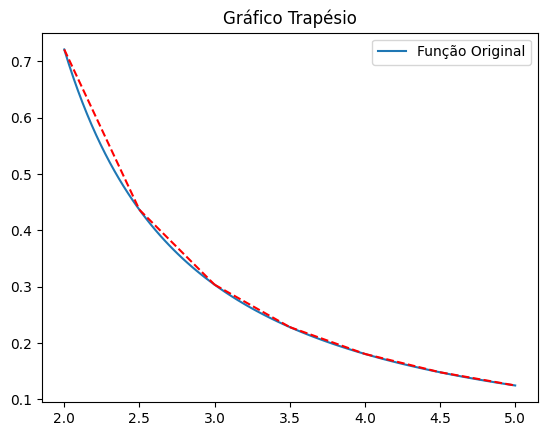

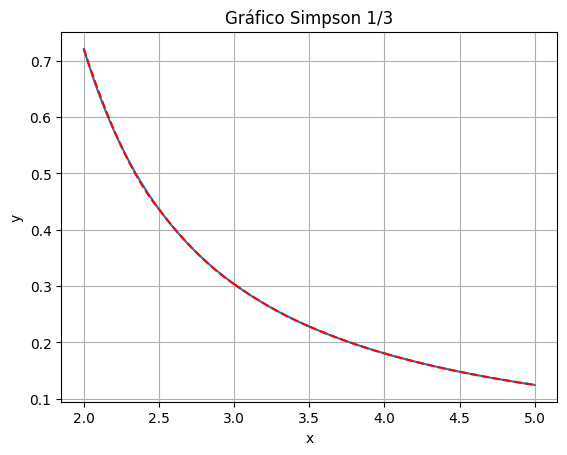

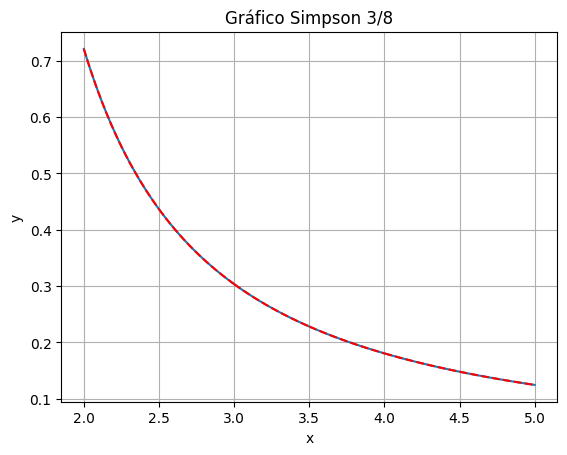

In [ ]:
a = 2
b = 5
m = 6
f = lambda x: 1 / (x * np.log(x))

graficoTrapesio(a, b, m, f)
graficoSimpson_13(a, b, m, f)
graficoSimpson_38(a, b, m, f)

Ao comparar os gráficos das funções aproximadas pelos métodos do Trapézio e de Simpson com a função original, podemos observar como cada método se ajusta à curva. Ao comparar os gráficos percebe-se que visualmente os métodos de Simpson (tanto 1/3 quanto 3/8) quase não apresentam diferenças visualmente.

Entretanto, é possível notar que o método de Simpson, por utilizar parábolas para a interpolação, se ajusta mais precisamente à função original em áreas onde há curvaturas significativas, em comparação ao método do Trapézio. Essa capacidade do método de Simpson de capturar melhor as nuances da função original pode explicar por que ele tende a fornecer uma estimativa mais precisa da integral em comparação ao método do Trapézio.

###Questão 2
**Resolver o problema de valor inicial abaixo utilizando o método de Euler e Runge-Kutta de ordem quatro com o número de subintervalos m indicado.**

**a) y'= $x^2$ + $y^2$, y(1) = 0, x ∈ [1, 2] e m = 8**

A seguir são executados o método de Euler e RK4 para o problema em questão:

In [ ]:
f = lambda x, y: x**2 + y**2
a = 1
b = 2
m = 8
y0 = 0

euler(a, b, y0, m, f)
rk4(a, b, y0, m, f)


=== Euler ===
=> Resultado: 3.391950316159075

=== RK4 ===
=> Resultado: 6.683612959581662



Ao analisar os resultados, observa-se uma diferença significativa nos resultados obtidos pelos dois métodos. O método de Euler é conhecido por sua simplicidade e facilidade de implementação, porém pode produzir resultados menos precisos em comparação com métodos mais avançados, como o RK4. Por outro lado, o método RK4 é reconhecido por oferecer uma precisão maior.

 Com base apenas nas informações disponíveis (sem o valor real da solução), é possível concluir que o método de Runge-Kutta de ordem quatro (RK4) produziu uma solução mais precisa para o problema fornecido em comparação com o método de Euler. Isso ressalta a importância de considerar métodos mais avançados, como o RK4, quando a precisão é uma preocupação. Essa escolha adequada do método de solução pode fazer uma diferença substancial nos resultados obtidos em problemas de valor inicial.